In [1]:

import pandas as pd
from textblob import TextBlob


df = pd.read_csv('Ethereum_2024_7_File.csv')


# Define a function to get sentiment
def get_sentiment(text):
    if pd.isnull(text):
        return 0, 0
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the sentiment function to your title column
df['polarity'], df['subjectivity'] = zip(*df['title'].apply(get_sentiment))

# Keep only the required columns
df = df[['title', 'score', 'created', 'polarity', 'subjectivity']]

# Inspect the results
print(df.head())


                                               title  score     created  \
0               Li.Fi drained for 10 million dollars      3  2024-07-16   
1  WARNING ABOUT SCAMS: Recently there have been ...      1  2024-07-16   
2          Explain me Business Model of L2 companies      0  2024-07-16   
3  WARNING ABOUT SCAMS: Recently there have been ...      1  2024-07-01   
4  Sequencer fees. Transactions require gas, gas ...      5  2024-07-01   

   polarity  subjectivity  
0  0.000000      0.000000  
1 -0.358974      0.765385  
2  0.000000      0.000000  
3 -0.358974      0.765385  
4  0.500000      0.500000  


In [3]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('Ethereum_2024_7_File.csv')

# Function to get the sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to classify the sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to the dataframe
df['Polarity'] = df['title'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Show the results
df.head()

# # Optionally, save the results to a new CSV file
df.to_csv('Ethereum_2024_7_File_with_sentiment.csv', index=False)


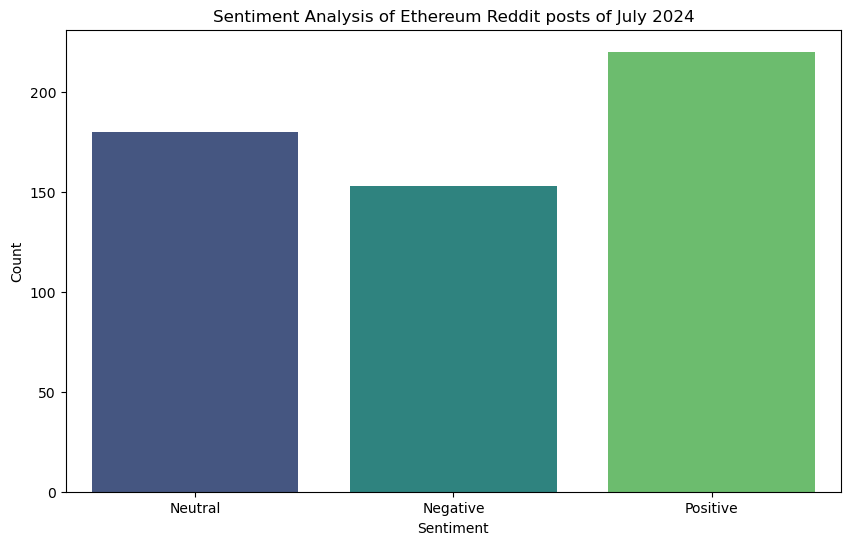

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the results
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Analysis of Ethereum Reddit posts of July 2024')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()